### features:
* time domain features
* statistical features
* selected spectogram coef
* all zero crossing rate coef
* all chromogram values
* no tempogram values
* wavelet level 5
* fractal analysis


In [3]:
import pandas as pd 
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
import itertools

In [4]:
path =  "/Users/ecem/Desktop/phonocardiogram/data"

## Load data

In [5]:
time_domain_features = pd.read_csv(path + "/time-domain-features.csv", index_col = 0)
statistical_features = pd.read_csv(path + "/statistical-features.csv", index_col = 0)
fractal_features = pd.read_csv(path + "/mock-features.csv", index_col = 0)
bandpower = pd.read_csv(path + "/bandpower.csv", index_col = 0)
wavelet = pd.read_csv(path + "/wavelet5.csv", index_col = 0)

In [6]:
time_domain_features.head()

,energy,entropy,spectral entropy,spectral rolloff,spectral centorid
0,0.003627,1.669286,0.188441,0.07420,0.053309
1,0.000750,2.963927,0.043663,0.04800,0.042804
2,0.000388,2.840991,0.017348,0.04395,0.034369
3,0.000528,2.859511,0.025138,0.04730,0.037526
4,0.000721,2.733358,0.029182,0.04545,0.041871


In [7]:
statistical_features.head()

,mean,std,skewness,kurtosis,harmonic mean,ac peak height mean
0,-0.000040,0.060224,-0.638895,51.817342,4.405790e-10,2.167401
1,-0.000483,0.027385,0.169739,2.901926,1.058298e-08,0.825860
2,-0.000067,0.019704,0.181507,4.582113,2.210099e-09,0.303073
3,-0.000062,0.022971,-0.092871,3.136028,4.928371e-09,0.467023
4,0.000141,0.026843,0.031420,4.079496,1.251589e-11,0.599395


In [8]:
fractal_features.head()

,petrosian f.a.,katz f.a.,higuchi f.a.,deterended fluctuations f.a.
0,1.002736,1.920990,1.091685,0.921825
1,1.002308,2.377508,1.052431,0.904970
2,1.002273,2.223252,1.046259,0.982775
3,1.002218,2.291023,1.048935,0.942318
4,1.002254,2.274571,1.046809,0.918872


In [10]:
features = pd.concat([statistical_features, time_domain_features, fractal_features, bandpower, wavelet], axis = 1)
features.head()

,mean,std,skewness,kurtosis,harmonic mean,ac peak height mean,energy,entropy,spectral entropy,spectral rolloff,...,8095,12190,8097.1,8098,12193,12194,16313,16320,16323,8141
0,-0.000040,0.060224,-0.638895,51.817342,4.405790e-10,2.167401,0.003627,1.669286,0.188441,0.07420,...,-6.515215e-07,-1.720367e-07,-8.527579e-07,2.527677e-07,2.103104e-07,3.293214e-07,-6.520820e-07,-4.234835e-07,-2.114034e-07,-8.425136e-07
1,-0.000483,0.027385,0.169739,2.901926,1.058298e-08,0.825860,0.000750,2.963927,0.043663,0.04800,...,-7.575331e-07,5.155071e-07,-2.496122e-07,5.929903e-07,-6.243171e-07,2.834713e-07,-1.397158e-06,-7.738172e-07,8.833731e-07,-5.069823e-07
2,-0.000067,0.019704,0.181507,4.582113,2.210099e-09,0.303073,0.000388,2.840991,0.017348,0.04395,...,-2.414427e-07,-3.924055e-07,4.488352e-07,4.692565e-07,2.697141e-07,4.754459e-07,-2.791003e-07,-3.848954e-07,1.913400e-07,-6.010123e-08
3,-0.000062,0.022971,-0.092871,3.136028,4.928371e-09,0.467023,0.000528,2.859511,0.025138,0.04730,...,-2.872505e-07,-6.227539e-07,-1.343183e-06,-2.651809e-07,9.557136e-07,4.895669e-07,-4.541868e-07,-6.184251e-07,4.075648e-07,6.504983e-07
4,0.000141,0.026843,0.031420,4.079496,1.251589e-11,0.599395,0.000721,2.733358,0.029182,0.04545,...,-2.138322e-07,-5.177499e-07,2.224215e-07,2.691604e-07,6.470726e-07,4.887128e-07,3.295942e-07,3.652303e-07,-4.095522e-07,6.816736e-07


## Load labels

In [11]:
labels = np.load(path + "/labels.npy", allow_pickle = True)

In [12]:
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(features, labels, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [13]:
import xgboost as xgb
classifier = MultiOutputClassifier(xgb.XGBClassifier(objective = 'binary:logistic'))

clf = Pipeline([('classify', classifier)])


In [14]:
clf.fit(X_train_, y_train_)


Pipeline(steps=[('classify',
                 MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                                               eval_metric=None,
                                                               gamma=None,
                                                               gpu_id=None,
                                                               grow_policy=None,
                                                               importance_type=None,
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=None, ...)))])

In [15]:
yhat = clf.predict(X_valid_)

In [16]:
df_results_test = pd.DataFrame({'AV': y_valid_[:,0], 'MV': y_valid_[:,1], 'PV': y_valid_[:,2], 'TV': y_valid_[:,3],
                        'predicted AV': yhat[:,0],
                          'predicted MV': yhat[:,1],
                          'predicted PV': yhat[:,2], 
                          'predicted TV': yhat[:,3]})
df_results_test

,AV,MV,PV,TV,predicted AV,predicted MV,predicted PV,predicted TV
0,0.0,0.0,0.0,1.0,0,0,0,0
1,0.0,0.0,1.0,0.0,0,0,0,0
2,0.0,1.0,0.0,0.0,0,1,0,0
3,0.0,0.0,1.0,0.0,0,0,0,0
4,0.0,1.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...
941,1.0,0.0,0.0,0.0,1,0,0,0
942,0.0,0.0,1.0,0.0,0,0,0,0
943,0.0,1.0,0.0,0.0,0,0,0,0
944,1.0,0.0,0.0,0.0,0,0,0,0


In [17]:
auc_y1 = roc_auc_score(y_valid_[:,0],yhat[:,0])
auc_y2 = roc_auc_score(y_valid_[:,1],yhat[:,1])
auc_y3 = roc_auc_score(y_valid_[:,2],yhat[:,2])
auc_y4 = roc_auc_score(y_valid_[:,3],yhat[:,3])

print("ROC AUC AV: %.4f, MV: %.4f, PV: %.4f, TV: %.4f " % (auc_y1, auc_y2, auc_y3, auc_y4))


ROC AUC AV: 0.5710, MV: 0.5199, PV: 0.5648, TV: 0.5720 


In [18]:
weighted_roc_auc_ovo = roc_auc_score(
    y_valid_, yhat, multi_class="ovr", average="weighted"
)

In [19]:
weighted_roc_auc_ovo

0.5584196742899133

In [20]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_valid_[:, i], yhat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_valid_.ravel(), yhat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


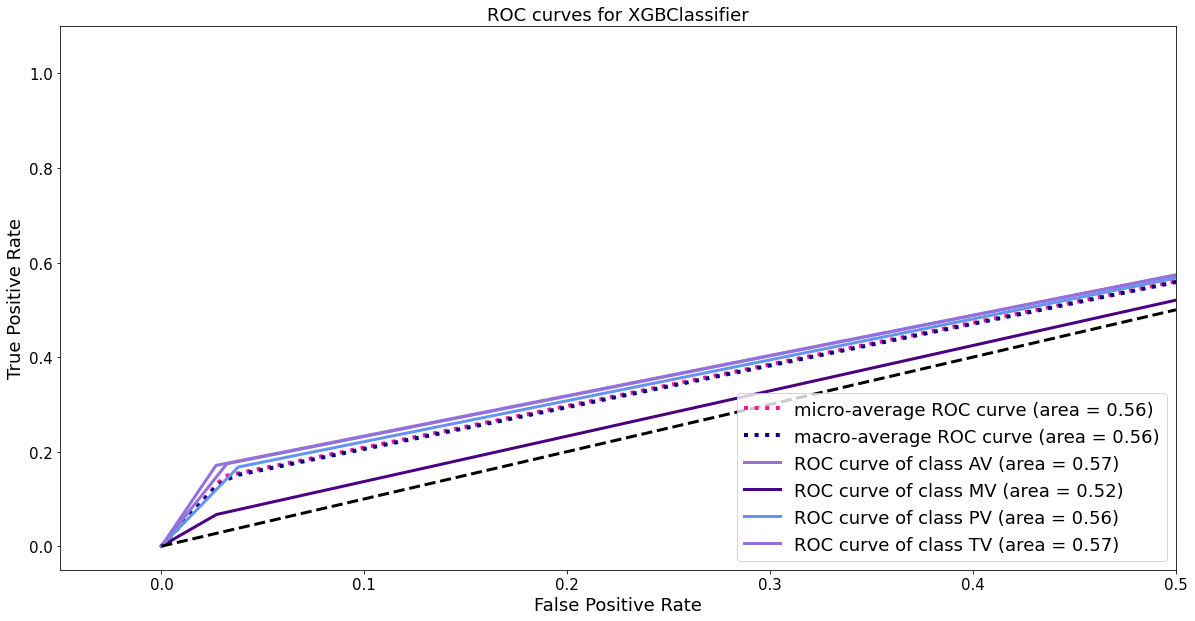

In [21]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_valid_[:, i], yhat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_valid_.ravel(), yhat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

n_classes = 4
class_names = ["AV", "MV", "PV", "TV"]

from itertools import cycle
lw =3

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (20, 10))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["mediumpurple", "indigo", "cornflowerblue"])

for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=3,
        label="ROC curve of class {0} (area = {1:0.2f})".format(class_names[i], roc_auc[i]),
    )

plt.plot([0.0, 0.5], [0.0, 0.5], "k--", lw=lw)
plt.xlim([-0.05, 0.5])
plt.xticks(fontsize=15)
plt.ylim([-0.05, 1.1])
plt.yticks(fontsize=15)
plt.xlabel("False Positive Rate",fontsize = 18 )
plt.ylabel("True Positive Rate", fontsize = 18)
plt.title("ROC curves for XGBClassifier",fontsize = 18)
plt.legend(loc="lower right", fontsize = 18) 
plt.show()

In [22]:
cm_y1 = confusion_matrix(y_valid_[:,0],yhat[:,0])
cm_y2 = confusion_matrix(y_valid_[:,1],yhat[:,1])
cm_y3 = confusion_matrix(y_valid_[:,2],yhat[:,2])
cm_y4 = confusion_matrix(y_valid_[:,3],yhat[:,3])
print(cm_y1)



[[660  22]
 [218  46]]


In [23]:
class_dict = {0:'AV', 1:'MV', 2:'PV', 3:'TV'}

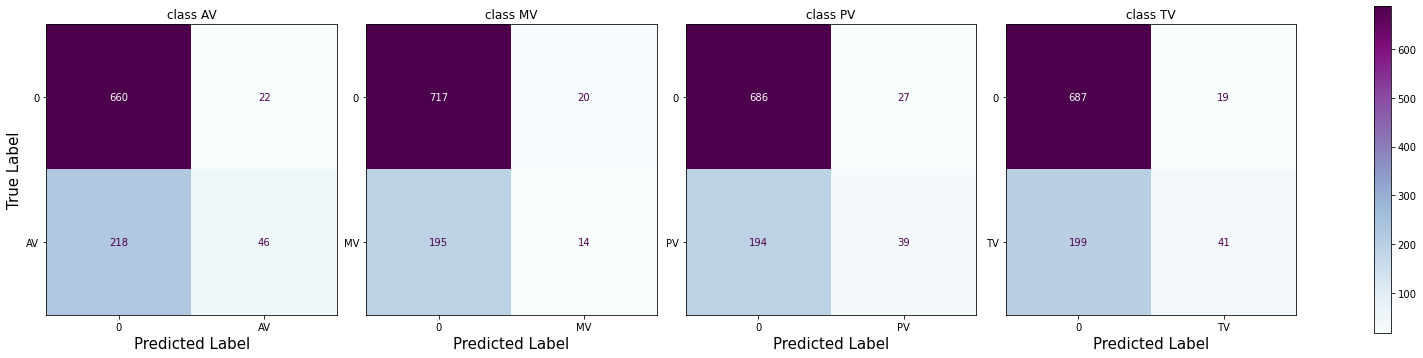

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

f, axes = plt.subplots(1, 4, figsize=(28, 15))
axes = axes.ravel()
for i in range(4):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_valid_[:, i],
                                                   yhat[:, i]),
                                  display_labels=[0, i])
    if i == 0:
        disp.plot(ax=axes[i], values_format='.4g' , cmap = 'BuPu')
        disp.ax_.set_title(f'class {class_names[i]}')
        disp.ax_.set_xlabel('Predicted Label', fontsize =15)
        disp.ax_.set_ylabel('True Label', fontsize = 15)
        disp.ax_.set_xticklabels([0,class_names[i]])
        disp.ax_.set_yticklabels([0,class_names[i]])
        disp.im_.colorbar.remove()
    else:
        disp.plot(ax=axes[i], values_format='.4g' , cmap = 'BuPu')
        disp.ax_.set_title(f'class {class_names[i]}')
        disp.ax_.set_xlabel('Predicted Label', fontsize =15)
        disp.ax_.set_ylabel(' ')
        disp.ax_.set_xticklabels([0,class_names[i]])
        disp.ax_.set_yticklabels([0,class_names[i]])
        disp.im_.colorbar.remove()
        

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes, shrink= 0.4)
plt.show()

In [25]:
cm_y2

array([[717,  20],
       [195,  14]])

In [26]:
cm_y3

array([[686,  27],
       [194,  39]])

In [27]:
cm_y4

array([[687,  19],
       [199,  41]])

In [28]:
cr_y1 = classification_report(y_valid_[:,0],yhat[:,0]) # AR
cr_y2 = classification_report(y_valid_[:,1],yhat[:,1]) # AS
cr_y3 = classification_report(y_valid_[:,2],yhat[:,2]) # MR
cr_y4 = classification_report(y_valid_[:,3],yhat[:,3]) # MS

print (cr_y1)
print (cr_y2)
print (cr_y3)
print (cr_y4)




              precision    recall  f1-score   support

         0.0       0.75      0.97      0.85       682
         1.0       0.68      0.17      0.28       264

    accuracy                           0.75       946
   macro avg       0.71      0.57      0.56       946
weighted avg       0.73      0.75      0.69       946

              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87       737
         1.0       0.41      0.07      0.12       209

    accuracy                           0.77       946
   macro avg       0.60      0.52      0.49       946
weighted avg       0.70      0.77      0.70       946

              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86       713
         1.0       0.59      0.17      0.26       233

    accuracy                           0.77       946
   macro avg       0.69      0.56      0.56       946
weighted avg       0.73      0.77      0.71       946

              preci

## With threshold

In [29]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold =  0.001)   # düşük  threshold
_ = vt.fit(features)
masked = vt.get_support()
features_masked = features.loc[:, masked]
features_masked # uncomment to see the dataframe

,std,skewness,kurtosis,ac peak height mean,entropy,spectral entropy,katz f.a.,higuchi f.a.,deterended fluctuations f.a.,259,...,2028,1011,1021,55,191,1366,4479,4735,4905,4906
0,0.060224,-0.638895,51.817342,2.167401,1.669286,0.188441,1.920990,1.091685,0.921825,0.052916,...,-0.011615,0.000309,0.006400,-0.000493,-0.002456,0.000094,0.004780,-0.001922,0.001709,-0.002316
1,0.027385,0.169739,2.901926,0.825860,2.963927,0.043663,2.377508,1.052431,0.904970,0.030207,...,-0.026076,-0.008559,0.009043,0.002895,-0.002643,-0.003303,-0.002702,-0.001241,0.002863,-0.002348
2,0.019704,0.181507,4.582113,0.303073,2.840991,0.017348,2.223252,1.046259,0.982775,0.072346,...,-0.052581,0.001240,0.013356,0.001097,-0.000017,0.000565,0.002223,-0.001348,0.000942,-0.001161
3,0.022971,-0.092871,3.136028,0.467023,2.859511,0.025138,2.291023,1.048935,0.942318,0.512340,...,0.005037,-0.051421,0.007181,0.001556,-0.000221,-0.000137,-0.002939,-0.000122,0.002100,-0.001556
4,0.026843,0.031420,4.079496,0.599395,2.733358,0.029182,2.274571,1.046809,0.918872,-0.007128,...,0.007578,-0.015850,-0.018295,0.001013,0.000843,0.000773,0.002850,-0.000133,0.000018,-0.000595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0.222230,0.235907,3.293451,94.429661,2.913031,0.003455,1.917979,1.016475,1.278429,-1.801038,...,-0.007513,0.007386,0.009196,-0.001787,-0.001126,-0.003648,0.013125,-0.009258,-0.000193,-0.001621
1201,0.191557,0.023518,4.545471,69.914666,2.950586,0.004319,1.853328,1.022238,1.283995,3.917603,...,-0.008545,-0.003097,0.012119,0.002956,-0.006249,-0.000855,-0.003435,-0.003407,-0.005998,0.006859
1202,0.214602,0.145022,4.014102,100.846936,3.018884,0.004654,1.901451,1.022018,1.306491,0.260889,...,-0.001181,0.010893,0.010858,0.001109,-0.000639,0.008445,0.004527,0.004605,-0.000473,-0.003364
1203,0.190516,0.021085,3.707966,71.007218,2.993076,0.014952,1.815818,1.054990,1.273177,0.123937,...,-0.039566,0.011800,0.016983,0.004471,0.004522,-0.000220,-0.004904,-0.002424,-0.006895,0.011761


In [30]:
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(features_masked, labels, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [31]:
import xgboost as xgb
classifier = MultiOutputClassifier(xgb.XGBClassifier(objective = 'binary:logistic'))

clf = Pipeline([('classify', classifier)])

In [32]:
clf.fit(X_train_, y_train_)


Pipeline(steps=[('classify',
                 MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                                               eval_metric=None,
                                                               gamma=None,
                                                               gpu_id=None,
                                                               grow_policy=None,
                                                               importance_type=None,
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=None, ...)))])

In [33]:
yhat = clf.predict(X_valid_)

In [34]:
df_results_test = pd.DataFrame({'AV': y_valid_[:,0], 'MV': y_valid_[:,1], 'PV': y_valid_[:,2], 'TV': y_valid_[:,3],
                        'predicted AV': yhat[:,0],
                          'predicted MV': yhat[:,1],
                          'predicted PV': yhat[:,2], 
                          'predicted TV': yhat[:,3]})
df_results_test

,AV,MV,PV,TV,predicted AV,predicted MV,predicted PV,predicted TV
0,0.0,0.0,0.0,1.0,0,0,0,0
1,0.0,0.0,1.0,0.0,0,0,0,0
2,0.0,1.0,0.0,0.0,0,0,0,0
3,0.0,0.0,1.0,0.0,0,0,0,0
4,0.0,1.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...
941,1.0,0.0,0.0,0.0,0,0,0,0
942,0.0,0.0,1.0,0.0,0,0,0,0
943,0.0,1.0,0.0,0.0,0,0,0,0
944,1.0,0.0,0.0,0.0,1,0,0,0


In [35]:
auc_y1 = roc_auc_score(y_valid_[:,0],yhat[:,0])
auc_y2 = roc_auc_score(y_valid_[:,1],yhat[:,1])
auc_y3 = roc_auc_score(y_valid_[:,2],yhat[:,2])
auc_y4 = roc_auc_score(y_valid_[:,3],yhat[:,3])

print("ROC AUC AV: %.4f, MV: %.4f, PV: %.4f, TV: %.4f " % (auc_y1, auc_y2, auc_y3, auc_y4))

ROC AUC AV: 0.5678, MV: 0.5094, PV: 0.5684, TV: 0.5656 


In [36]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_valid_[:, i], yhat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_valid_.ravel(), yhat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

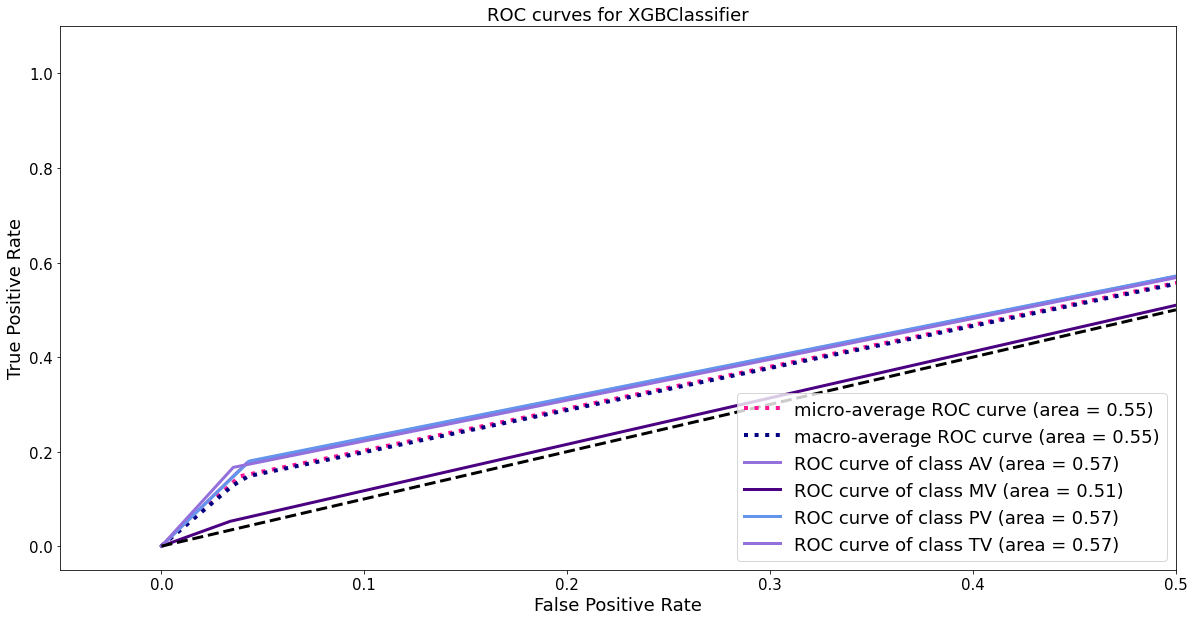

In [37]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_valid_[:, i], yhat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_valid_.ravel(), yhat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

n_classes = 4
class_names = ["AV", "MV", "PV", "TV"]

from itertools import cycle
lw =3

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (20, 10))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["mediumpurple", "indigo", "cornflowerblue"])

for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=3,
        label="ROC curve of class {0} (area = {1:0.2f})".format(class_names[i], roc_auc[i]),
    )

plt.plot([0.0, 0.5], [0.0, 0.5], "k--", lw=lw)
plt.xlim([-0.05, 0.5])
plt.xticks(fontsize=15)
plt.ylim([-0.05, 1.1])
plt.yticks(fontsize=15)
plt.xlabel("False Positive Rate",fontsize = 18 )
plt.ylabel("True Positive Rate", fontsize = 18)
plt.title("ROC curves for XGBClassifier",fontsize = 18)
plt.legend(loc="lower right", fontsize = 18) 
plt.show()

In [38]:
cr_y1 = classification_report(y_valid_[:,0],yhat[:,0]) # AR
cr_y2 = classification_report(y_valid_[:,1],yhat[:,1]) # AS
cr_y3 = classification_report(y_valid_[:,2],yhat[:,2]) # MR
cr_y4 = classification_report(y_valid_[:,3],yhat[:,3]) # MS

print (cr_y1)
print (cr_y2)
print (cr_y3)
print (cr_y4)

              precision    recall  f1-score   support

         0.0       0.75      0.96      0.84       682
         1.0       0.62      0.18      0.28       264

    accuracy                           0.74       946
   macro avg       0.68      0.57      0.56       946
weighted avg       0.71      0.74      0.68       946

              precision    recall  f1-score   support

         0.0       0.78      0.97      0.86       737
         1.0       0.31      0.05      0.09       209

    accuracy                           0.76       946
   macro avg       0.54      0.51      0.48       946
weighted avg       0.68      0.76      0.69       946

              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86       713
         1.0       0.58      0.18      0.27       233

    accuracy                           0.77       946
   macro avg       0.68      0.57      0.57       946
weighted avg       0.73      0.77      0.72       946

              preci